## Dependencies

In [6]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


import torch
from torch.utils.data import DataLoader,random_split
from torchvision import transforms


import importlib
import dataloader
import config
import model
import train


importlib.reload(dataloader)
importlib.reload(config)
importlib.reload(model)
importlib.reload(train)

from train import train,validate,inference
from dataloader import create_dataloaders
from config import Config
from model import ModelV1,initialize_weights
from utils import get_metrics

config = Config()

## Prepare Dataset

In [7]:
train_loader, val_loader, hb_mean, hb_std = create_dataloaders(
    data_dir=config.data_dir,
    batch_size=config.batch_size,
    test_split=config.test_split,
)

## Create Model

In [11]:
model_obj = ModelV1(freeze_backbone=True, unfreeze_from_layer='layer4')
if config.load_model:
    model_obj.load_state_dict(torch.load(config.model_load_path))
# else:
#     initialize_weights(model_obj)

## Train

In [ ]:
train(model = model_obj,dataloader = train_loader,val_loader = val_loader, config = config)

## Validate Model

In [12]:
_ = validate(model = model_obj, dataloader = val_loader, config = Config())

[Validation] Batch [23/23] - Batch Loss: 0.3471
[Validation] Completed. Avg Loss: 0.9924

[Validation Metrics]
MSE: 0.9924
RMSE: 0.9962
MAE: 0.7461
R2: 0.0930
MAPE (%): 158.5107


## Inference

Predicted HB: 11.83       | Actual HB: 13.20
Predicted HB: 12.02       | Actual HB: 13.00
Predicted HB: 11.30       | Actual HB: 13.20
Predicted HB: 11.12       | Actual HB: 11.60
Predicted HB: 12.23       | Actual HB: 11.30
Predicted HB: 10.82       | Actual HB: 10.70
Predicted HB: 11.80       | Actual HB: 12.20
Predicted HB: 11.60       | Actual HB: 12.30
Predicted HB: 11.88       | Actual HB: 12.80


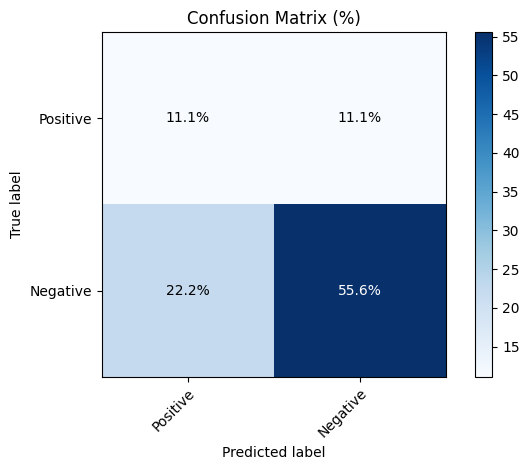

Accuracy: 66.667%
Precision: 0.333
Sensitivity (Recall): 0.500
Specificity: 0.714
F1 Score: 0.400


In [13]:
results = []
for i in range(1,10):
    paths = f"/Users/maheshsaravanan/Documents/HemoScan/Dataset/{i:04d}"
    out = inference(model = model_obj, path = paths,transform = val_loader.dataset.dataset.transform, mean = hb_mean, std = hb_std)
    results.append((out))
get_metrics(results, threshold = 12)